In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator as Imgen

In [2]:
# augmenting the training dataset
traingen = Imgen(
                 rescale=1./255,
                 shear_range=0.2,
                 zoom_range = 0.3,
                 width_shift_range = 0.2,
                 height_shift_range = 0.2,
                 fill_mode = "nearest",
                 validation_split=0.15)
#Augmenting the test dataset
testgen = Imgen(# rescale the images to 1./255
                rescale = 1./255
                )

In [3]:
trainds = traingen.flow_from_directory("Training/",
                                       target_size = (130,130),
                                       seed=123,
                                       batch_size = 16,
                                       subset="training"
                                      )
valds = traingen.flow_from_directory("Training/",
                                       target_size = (130,130),
                                       seed=123,
                                       batch_size = 16,
                                       subset="validation"
                                      )
testds = traingen.flow_from_directory("Training/",
                                       target_size = (130,130),
                                       seed=123,
                                       batch_size = 16,
                                       shuffle=False)

Found 4857 images belonging to 4 classes.
Found 855 images belonging to 4 classes.
Found 5712 images belonging to 4 classes.


In [4]:
c = trainds.class_indices
classes = list(c.keys())
classes

['glioma', 'meningioma', 'notumor', 'pituitary']

In [15]:
x,y = next(trainds)
def plotImages(x,y):
    plt.figure(figsize=[11,8])
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.imshow(x[i])
        plt.title(classes[np.argmax(y[i])])
        plt.axis("off")
    plt.show()

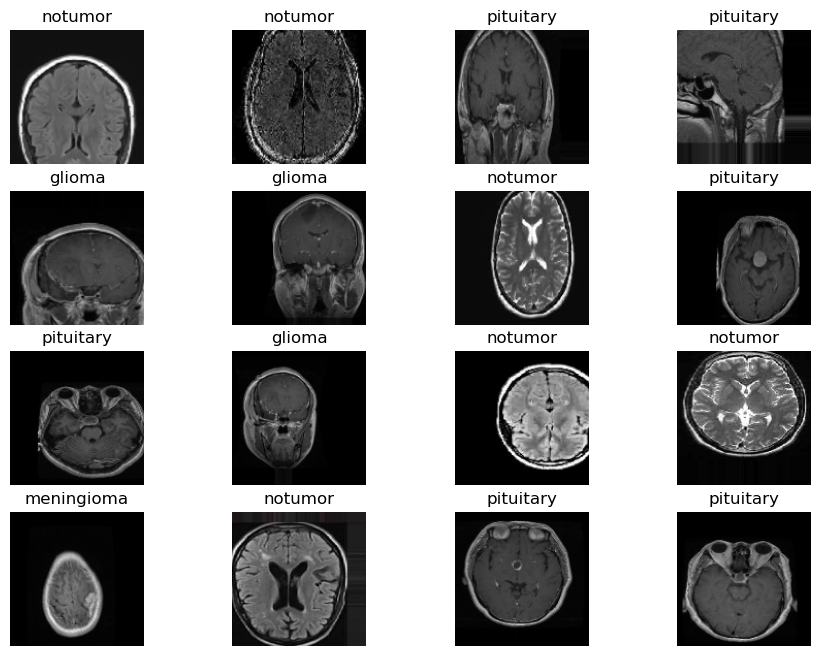

In [16]:
# call the plotImages function
plotImages(x,y)

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Activation
from keras.metrics import categorical_crossentropy
from keras.optimizers import Adam

In [46]:
cnn = Sequential([
    # firt Layer
    Conv2D(filters=16, kernel_size=(3, 3), padding = 'same', activation='relu', input_shape=(130, 130, 3)),
    MaxPooling2D((2, 2)),
    # second layer
    Conv2D(filters=32, kernel_size=(3, 3), padding = 'same', activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0,20),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='relu'),
    Dense(4, activation='softmax')
])

In [47]:
cnn.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 130, 130, 16)      448       
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 65, 65, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 65, 65, 32)        4640      
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 flatten_10 (Flatten)        (None, 32768)            

In [48]:
# Compile the model
cnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [49]:
history = cnn.fit(trainds,validation_data=valds,epochs=50, batch_size=16, verbose=1)

Epoch 1/50
304/304 [==============================] - 308s 1s/step - loss: 1.1565 - accuracy: 0.4357 - val_loss: 1.0641 - val_accuracy: 0.5181
Epoch 2/50
304/304 [==============================] - 290s 952ms/step - loss: 0.8743 - accuracy: 0.6129 - val_loss: 0.9408 - val_accuracy: 0.6257
Epoch 3/50
304/304 [==============================] - 286s 940ms/step - loss: 0.7363 - accuracy: 0.6963 - val_loss: 0.8686 - val_accuracy: 0.6772
Epoch 4/50
304/304 [==============================] - 285s 935ms/step - loss: 0.6655 - accuracy: 0.7288 - val_loss: 0.8837 - val_accuracy: 0.6655
Epoch 5/50
304/304 [==============================] - 285s 937ms/step - loss: 0.6187 - accuracy: 0.7470 - val_loss: 0.8123 - val_accuracy: 0.6994
Epoch 6/50
304/304 [==============================] - 284s 934ms/step - loss: 0.5949 - accuracy: 0.7671 - val_loss: 0.8999 - val_accuracy: 0.6725
Epoch 7/50
304/304 [==============================] - 284s 935ms/step - loss: 0.5444 - accuracy: 0.7783 - val_loss: 0.9150 - va

In [50]:
cnn.evaluate(testds)

357/357 [==============================] - 176s 492ms/step - loss: 0.2956 - accuracy: 0.8990


[0.2956394553184509, 0.8989846110343933]

<Figure size 640x480 with 0 Axes>

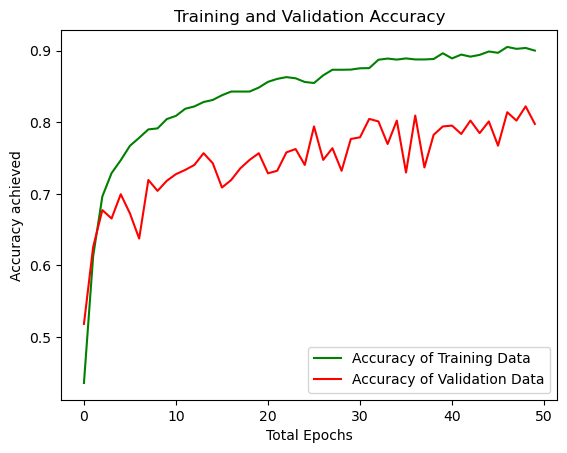

<Figure size 640x480 with 0 Axes>

In [51]:
epochs = range(len(history.history['accuracy']))
plt.plot(epochs, history.history['accuracy'], 'green', label='Accuracy of Training Data')
plt.plot(epochs, history.history['val_accuracy'], 'red', label='Accuracy of Validation Data')
plt.xlabel('Total Epochs')
plt.ylabel('Accuracy achieved')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()

C:\Users\royalgifts\AppData\Local\Temp\ipykernel_4920\2088272338.py:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  image = ImageOps.fit(image, size, Image.ANTIALIAS)


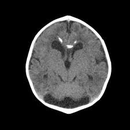

In [52]:
from matplotlib.pyplot import imshow
from PIL import Image, ImageOps
data = np.ndarray(shape=(1, 130, 130, 3), dtype=np.float32)
image = Image.open("image.jpg")
size = (130, 130)
image = ImageOps.fit(image, size, Image.ANTIALIAS)
image_array = np.asarray(image)
display(image)
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
data[0] = normalized_image_array

In [53]:
prediction = cnn.predict(data)
print(prediction)
predict_index = np.argmax(prediction)
print(predict_index)

1/1 [==============================] - 7s 7s/step
[[0. 0. 1. 0.]]
2


In [54]:
print("There's {:.2f} percent probability that the Person has No Tumor".format(prediction[0][2]*100))

There's 100.00 percent probability that the Person has No Tumor


In [56]:
cnn.save('model.h5')